In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap

from scipy.stats import kurtosis, skew
from scipy.signal import find_peaks

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.inspection import (partial_dependence, PartialDependenceDisplay)

import random
import ruptures as rpt

In [2]:
def print_decision_rules(rf):

    for tree_idx, est in enumerate(rf.estimators_):
        tree = est.tree_
        assert tree.value.shape[1] == 1 # no support for multi-output

        print('TREE: {}'.format(tree_idx))

        iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
        for node_idx, data in iterator:
            left, right, feature, th, value = data

            # left: index of left child (if any)
            # right: index of right child (if any)
            # feature: index of the feature to check
            # th: the threshold to compare against
            # value: values associated with classes

            # for classifier, value is 0 except the index of the class to return
            class_idx = np.argmax(value[0])

            if left == -1 and right == -1:
                print('{} LEAF: return class={}'.format(node_idx, class_idx))
            else:
                print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, rf.feature_names_in_[feature], th, left, right))

In [3]:
def statistical_features(arr):
    vmin = np.amin(arr)
    vmax = np.amax(arr)
    mean = np.mean(arr)
    std = np.std(arr)
    return vmin, vmax, mean, std

def shape_features(arr):
    skewness = skew(arr)
    kurt = kurtosis(arr)
    return skewness, kurt

In [4]:
df_lag = pd.read_csv("C:/Users/milena/Documents/tcc/dataset/combinedlagEDA.csv")
train_set = df_lag.iloc[:,0:48]
labels = df_lag.iloc[:,48:49]

In [5]:
#Create a random forest Classifier
clf = RandomForestClassifier(n_estimators=100,max_depth=15)

# Split our data
train, test, train_labels, test_labels = train_test_split(train_set, labels, test_size=0.3, random_state=30)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train, train_labels.values.ravel())

y_pred = clf.predict(test)

In [6]:
f1score   = f1_score        (test_labels, y_pred, average = 'macro')
recall    = recall_score    (test_labels, y_pred, average = 'macro')
precision = precision_score (test_labels, y_pred, average = 'macro')
accuracy  = accuracy_score  (test_labels, y_pred)

print('acc =', accuracy)
print('pre =', precision)
print('recall =', recall) 
print('f1 =', f1score)

acc = 0.9512587038028923
pre = 0.9509340715414543
recall = 0.9294042300664805
f1 = 0.9386371235539438


<BarContainer object of 48 artists>

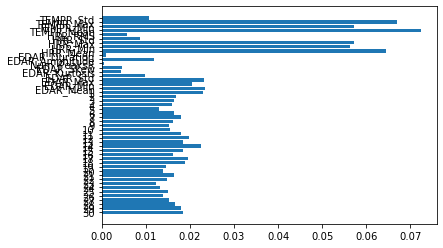

In [7]:
# feature imporance:
plt.barh(list(df_lag.columns.values[0:48]), clf.feature_importances_)

In [8]:
# decision rules
# print_decision_rules(clf)

In [9]:
# partial dependency plot
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[0:1]), target=0)

In [10]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[1:2]), target=0)

In [11]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[2:3]), target=0)

In [12]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[3:4]), target=0)

In [13]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[4:5]), target=0)

In [14]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[5:6]), target=0)

In [15]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[6:7]), target=0)

In [16]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[7:8]), target=0)

In [17]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[8:9]), target=0)

In [18]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[9:10]), target=0)

In [19]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[10:11]), target=0)

In [20]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[11:12]), target=0)

In [21]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[12:13]), target=0)

In [22]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[13:14]), target=0)

In [23]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[14:15]), target=0)

In [24]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[15:16]), target=0)

In [25]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[16:17]), target=0)

In [26]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[17:18]), target=0)

In [27]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[18:19]), target=0)

In [28]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[19:20]), target=0)

In [29]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[20:21]), target=0)

In [30]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[21:22]), target=0)

In [31]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[22:23]), target=0)

In [32]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[23:24]), target=0)

In [33]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[24:25]), target=0)

In [34]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[25:26]), target=0)

In [35]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[26:27]), target=0)

In [36]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[27:28]), target=0)

In [37]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[28:29]), target=0)

In [38]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[29:30]), target=0)

In [39]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[30:31]), target=0)

In [40]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[31:32]), target=0)

In [41]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[32:33]), target=0)

In [42]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[33:34]), target=0)

In [43]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[34:35]), target=0)

In [44]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[35:36]), target=0)

In [45]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[36:37]), target=0)

In [46]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[37:38]), target=0)

In [47]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[38:39]), target=0)

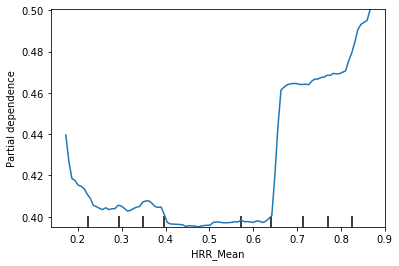

In [48]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[39:40]), target=0)

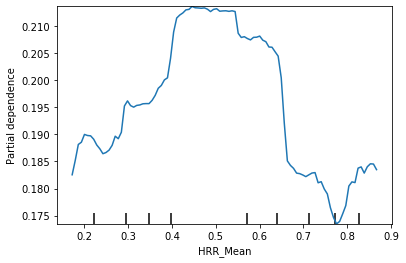

In [49]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[39:40]), target=1)

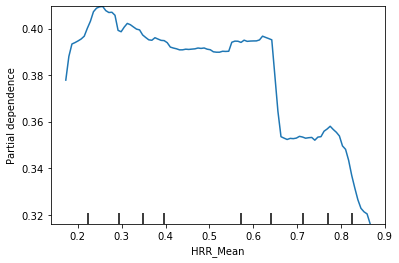

In [50]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[39:40]), target=2)

In [51]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[40:41]), target=0)

In [52]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[41:42]), target=0)

In [53]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[42:43]), target=0)

In [54]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[43:44]), target=0)

In [ ]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[44:45]), target=0)

In [ ]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[44:45]), target=1)

In [ ]:
PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[44:45]), target=2)

In [ ]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[45:46]), target=0)

In [ ]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[46:47]), target=0)

In [ ]:
# PartialDependenceDisplay.from_estimator(clf, train, features=list(df_lag.columns.values[47:48]), target=0)

In [ ]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(train)

In [ ]:
shap.dependence_plot("TEMPR_Max", shap_values[0], train)

In [ ]:
shap.force_plot(explainer.expected_value[0][0:10], shap_values[0][0:10])

In [ ]:
shap.summary_plot(shap_values, train)